In [2]:
pip install openpyxl

  Obtaining dependency information for openpyxl from https://files.pythonhosted.org/packages/c0/da/977ded879c29cbd04de313843e76868e6e13408a94ed6b987245dc7c8506/openpyxl-3.1.5-py2.py3-none-any.whl.metadata
  Obtaining dependency information for et-xmlfile from https://files.pythonhosted.org/packages/c1/8b/5fe2cc11fee489817272089c4203e679c63b570a5aaeb18d852ae3cbba6a/et_xmlfile-2.0.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/250.9 kB ? eta -:--:--
   ------ -------------------------------- 41.0/250.9 kB 653.6 kB/s eta 0:00:01
   --------------- ---------------------- 102.4/250.9 kB 991.0 kB/s eta 0:00:01
   ----------------------------- ---------- 184.3/250.9 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------  245.8/250.9 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 250.9/250.9 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.drawing.image import Image

In [30]:
# Load the dataset
file_path = "retail_sales_data.csv"  # Replace with your file path
df = pd.read_csv(file_path)

In [31]:
df.sample(10)

,Order_ID,Product,Category,Quantity,Price,Order_Date,Customer_Country,Region,Total_Sales
128,ORD1128,Charger,Accessories,2,399.16,2022-05-27,Brazil,South America,798.32
614,ORD1614,Laptop,Electronics,1,347.25,2022-01-28,USA,South America,347.25
831,ORD1831,Tablet,Electronics,1,346.64,2022-03-11,Brazil,South America,346.64
402,ORD1402,Laptop,Electronics,2,277.86,2022-09-05,Germany,Australia,555.72
438,ORD1438,Headphones,Electronics,3,337.22,2022-09-30,France,North America,1011.66
786,ORD1786,Smartphone,Electronics,2,256.51,2022-08-25,India,South America,513.02
444,ORD1444,Charger,Accessories,1,399.34,2022-02-08,France,Asia,399.34
447,ORD1447,Laptop,Electronics,3,497.76,2022-04-21,Brazil,Europe,1493.28
70,ORD1070,Laptop,Accessories,2,31.16,2022-04-09,Brazil,Europe,62.32
604,ORD1604,Tablet,Electronics,4,176.90,2022-10-16,France,Asia,707.60


In [32]:
# Extract Month-Year for trend analysis
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Month_Year'] = df['Order_Date'].dt.to_period('M')

In [33]:
df.head()

,Order_ID,Product,Category,Quantity,Price,Order_Date,Customer_Country,Region,Total_Sales,Month_Year
0,ORD1000,Headphones,Accessories,3,361.00,2022-11-07,Australia,Europe,1083.00,2022-11
1,ORD1001,Charger,Accessories,4,45.32,2022-12-24,Brazil,Australia,181.28,2022-12
2,ORD1002,Tablet,Accessories,1,44.92,2022-06-03,Brazil,South America,44.92,2022-06
3,ORD1003,Charger,Accessories,4,15.93,2022-09-17,China,Australia,63.72,2022-09
4,ORD1004,Charger,Accessories,3,478.69,2022-04-18,India,Asia,1436.07,2022-04


In [34]:
# 1. Sales Trends by Month
sales_trend = df.groupby('Month_Year')['Total_Sales'].sum().reset_index()
print(sales_trend)
sales_trend['Month_Year'] = sales_trend['Month_Year'].astype(str)

   Month_Year  Total_Sales
0     2022-01     45123.98
1     2022-02     51696.39
2     2022-03     49755.21
3     2022-04     53589.40
4     2022-05     54980.27
5     2022-06     51834.61
6     2022-07     66698.20
7     2022-08     44333.11
8     2022-09     51672.67
9     2022-10     48192.42
10    2022-11     61459.96
11    2022-12     48820.56


In [35]:
# 2. Top-Performing Products
top_products = df.groupby('Product')['Total_Sales'].sum().sort_values(ascending=False).reset_index()

In [36]:
# 3. Sales by Region and Category
region_category_sales = df.groupby(['Region', 'Category'])['Total_Sales'].sum().unstack()

In [37]:
# 4. Save Data to Excel
output_file = "sales_analysis_dashboard.xlsx"
wb = Workbook()
ws1 = wb.active
ws1.title = "Sales Trends"

In [38]:
# Add sales trend data
for r in dataframe_to_rows(sales_trend, index=False, header=True):
    ws1.append(r)

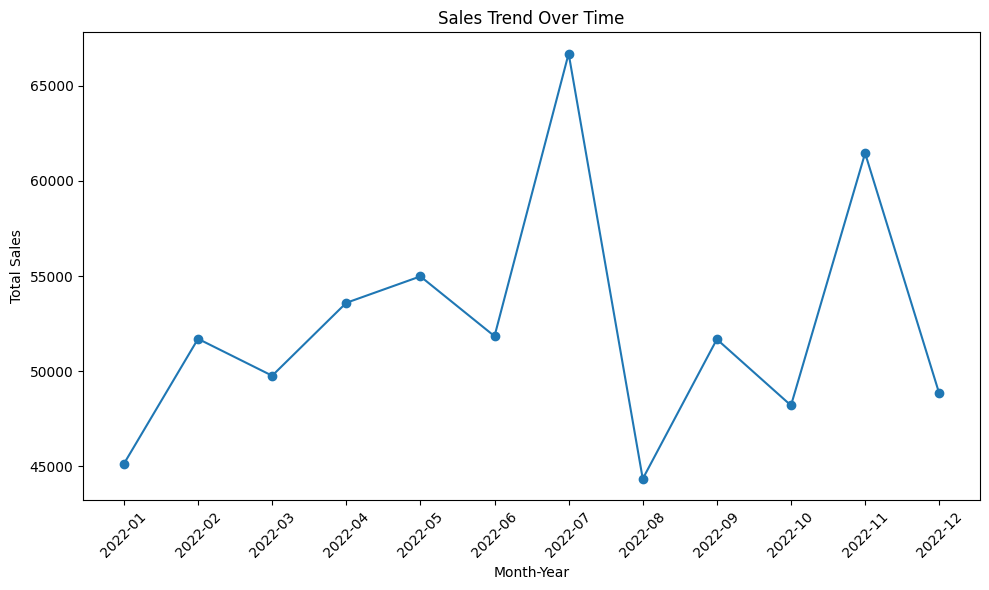

In [39]:
# Plot and add chart to the workbook
plt.figure(figsize=(10, 6))
plt.plot(sales_trend['Month_Year'], sales_trend['Total_Sales'], marker='o')
plt.title('Sales Trend Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("sales_trend_chart.png")

In [40]:
# Insert chart into the workbook
img = Image("sales_trend_chart.png")
ws1.add_image(img, "H2")

In [41]:
# Add other sheets
ws2 = wb.create_sheet(title="Top Products")
for r in dataframe_to_rows(top_products, index=False, header=True):
    ws2.append(r)

ws3 = wb.create_sheet(title="Region Category Sales")
for r in dataframe_to_rows(region_category_sales.reset_index(), index=False, header=True):
    ws3.append(r)

In [43]:
# Save the workbook
wb.save(output_file)
print(f"Dashboard saved to {output_file}")

Dashboard saved to sales_analysis_dashboard.xlsx
